# Ev for Selection and Analysis of v-Ar 1mu-1p with enhanced CCQE 
July 9, 2017

In [1]:
import sys; sys.path.insert(0, '../../../AnaTreesPackage/notebooks'); sys.path.insert(0, '../');
from ccqe_notebook_tools import *
from tracking_tools import *
from notebooks_tools import * 
%matplotlib inline

In [2]:
pair_types = ['all'   ,'1mu-1p'   ,'other pairs','cosmic' ,'CC 1p 0pi'    ]
labels     = ['all'   ,'1$\\mu$1p','other pairs','cosmic' ,'CC 1p 0$\\pi$']
colors     = ['black' ,'green'    ,'red'        ,'Orange' ,'blue'         ]
cmaps      = ['Greys' , 'Greens'  ,'Reds'       ,'Oranges','Blues'        ]
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/mupClassification/Figures/'

In [148]:
def get_pur_eff_cut(cut_name = '${PID}_A$' , reduced = dict()):
    global pur_eff
    Noriginal , Nreducted , freducted = dict() , dict() , dict()
    for pair_type in pair_types:
        sam = samples[pair_type]
        Noriginal[pair_type] = len(samples[pair_type])
        Nreducted[pair_type] = float(len(reduced[pair_type]))
        freducted[pair_type] = 100.0 * Nreducted[pair_type]/Noriginal[pair_type]
    pur_eff_cut = pd.DataFrame({'$\mu p$ eff.':'%.1f'%freducted['1mu-1p']+'%'
                               ,'$\mu p$ pur.':'%.1f'%(100.*Nreducted['1mu-1p']/Nreducted['all'] if Nreducted['all']>0 else 0)+'%'
                               ,'CC$0\pi 1 p$ eff.':'%.1f'%freducted['CC 1p 0pi']+'%'
                               ,'CC$0\pi 1 p$ pur.':'%.1f'%(100.*Nreducted['CC 1p 0pi']/Nreducted['all'] if Nreducted['all']>0 else 0)+'%'}
                               , index=[cut_name]
                              )
    for pair_type in pair_types: pur_eff_cut[pair_type] = '%.1f'%freducted[pair_type]+'%' +' (%.0f)'%Nreducted[pair_type]
    pur_eff = pur_eff.append(pur_eff_cut)
    reduced_samples[cut_name] = reduced  

# 2-tracks pairs

In [183]:
pairs = pd.read_csv('/Users/erezcohen/Desktop/uBoone/analysis/ccqe_candidates/ccqe_candidates_Topology_MCC8_MC_BNB_extBNB.csv')
pairsFV = sample_in_FV(pairs)
print len(pairs),'pairs from MC-BNB + cosmic DATA overlay'
print len(pairsFV),'pairs in FV'

42407 pairs from MC-BNB + cosmic DATA overlay
25825 pairs in FV


In [184]:
samples=dict()
for pair_type in pair_types:
    samples[pair_type] = pairsFV[pairsFV[pair_type]==True]
    Ntype = len(samples[pair_type])
    if pair_type=='CC 1p 0pi': print_line()
    print Ntype,'are '+pair_type+', %.1f'%(100.*float(Ntype)/len(pairsFV))+'%'

25825 are all, 100.0%
3243 are 1mu-1p, 12.6%
3206 are other pairs, 12.4%
19376 are cosmic, 75.0%
--------------------------------------------------------------
873 are CC 1p 0pi, 3.4%


In [185]:
reduced_samples=dict(dict())
pur_eff = pd.DataFrame()
reduced = dict()
for pair_type in pair_types: reduced[pair_type] = samples[pair_type]
reduced_samples['no cut'] = reduced
# before cuts
reduced = dict()
for pair_type in pair_types:
    sam = reduced_samples['no cut'][pair_type]
    reduced[pair_type] = sam
get_pur_eff_cut(cut_name = 'no cut', reduced = reduced)

# cut 1: PIDa
reduced = dict()
for pair_type in pair_types:
    sam = reduced_samples['no cut'][pair_type]
    reduced[pair_type] = sam[sam['PIDA_assigned_proton']>8]
get_pur_eff_cut(cut_name = '${PID}_A$', reduced = reduced)


# # cut 2: lµ vs lp
# reduced = dict()
# for pair_type in pair_types:
#     sam = reduced_samples['${PID}_A$'][pair_type]
#     reduced[pair_type] = sam[(sam['l_small_pida']>4)
#                              &(sam['l_large_pida']>8)&(sam['l_large_pida']<120)]
# get_pur_eff_cut(cut_name = '$l_{\\mu}-l_{p}$', reduced = reduced)


# cut 2.5: require that the longer track is the one with larger PIDa
reduced = dict()
for pair_type in pair_types:
    sam = reduced_samples['${PID}_A$'][pair_type]
    reduced[pair_type] = sam[sam['PIDA_long'] < sam['PIDA_short']]
get_pur_eff_cut(cut_name = '$l_{\\mu}>l_{p}$', reduced = reduced)



# cut 3: |\theta_{1,2}-90^0|<60^0$
reduced = dict()
for pair_type in pair_types:
    sam = reduced_samples['$l_{\\mu}>l_{p}$'][pair_type]
    reduced[pair_type] = sam[np.abs(180./np.pi*sam['2_tracks_angle']-90)<60]
get_pur_eff_cut(cut_name = '$|\theta_{1,2}-90^0|<60^0$', reduced = reduced)



# cut 4: vertex $\Delta Q$
reduced = dict()
for pair_type in pair_types:
    sam = reduced_samples['$|\theta_{1,2}-90^0|<60^0$'][pair_type]
    reduced[pair_type] = sam[sam['ratio_dQassociated_dQtot_ROI_20x40_AroundVertex_v']>-1.*sam['ratio_dQassociated_dQtot_ROI_20x40_AroundVertex_u']+1.5]
get_pur_eff_cut(cut_name = 'vertex $\Delta Q$', reduced = reduced)


# cut 5: $\Delta phi$
reduced = dict()
for pair_type in pair_types:
    sam = reduced_samples['vertex $\Delta Q$'][pair_type]
    reduced[pair_type] = sam[np.abs(sam['delta_phi']-180.000)<40]
get_pur_eff_cut(cut_name = '$|\Delta \phi - \pi|<40^{0}$', reduced = reduced)

# cut 6: $\theta_{pq}<25$
reduced = dict()
for pair_type in pair_types:
    sam = reduced_samples['$|\Delta \phi - \pi|<40^{0}$'][pair_type]
    reduced[pair_type] = sam[sam['reco_CC1p_theta_pq_fromE']<25]
get_pur_eff_cut(cut_name = '$\theta_{pq}<25$', reduced = reduced)


# modified cut 6: $p_{t}<0.35$
reduced = dict()
for pair_type in pair_types:
    sam = reduced_samples['$|\Delta \phi - \pi|<40^{0}$'][pair_type]
    reduced[pair_type] = sam[sam['reco_CC1p_Pt']<0.35]
get_pur_eff_cut(cut_name = '$p_{t}<0.35$', reduced = reduced)


# tight Pt cut for good Ev reconstruction
reduced = dict()
for pair_type in pair_types:
    sam = reduced_samples['$|\Delta \phi - \pi|<40^{0}$'][pair_type]
    reduced[pair_type] = sam[sam['reco_CC1p_Pt']<0.15]
get_pur_eff_cut(cut_name = '$p_{t}<0.15$', reduced = reduced)

pur_eff

,$\mu p$ eff.,$\mu p$ pur.,CC$0\pi 1 p$ eff.,CC$0\pi 1 p$ pur.,all,1mu-1p,other pairs,cosmic,CC 1p 0pi
no cut,100.0%,12.6%,100.0%,3.4%,100.0% (25825),100.0% (3243),100.0% (3206),100.0% (19376),100.0% (873)
${PID}_A$,94.2%,31.7%,94.2%,8.5%,37.3% (9628),94.2% (3055),60.7% (1945),23.9% (4628),94.2% (822)
$l_{\mu}>l_{p}$,75.7%,46.7%,78.7%,13.1%,20.4% (5264),75.7% (2456),30.2% (967),9.5% (1841),78.7% (687)
"$|\theta_{1,2}-90^0|<60^0$",69.3%,67.1%,75.6%,19.7%,13.0% (3350),69.3% (2248),19.4% (622),2.5% (480),75.6% (660)
vertex $\Delta Q$,44.1%,75.8%,66.9%,30.9%,7.3% (1887),44.1% (1430),9.1% (293),0.8% (164),66.9% (584)
$|\Delta \phi - \pi|<40^{0}$,31.3%,89.4%,59.9%,46.1%,4.4% (1135),31.3% (1015),3.1% (99),0.1% (21),59.9% (523)
$\theta_{pq}<25$,23.8%,92.8%,50.9%,53.4%,3.2% (832),23.8% (772),1.6% (50),0.1% (10),50.9% (444)
$p_{t}<0.35$,26.5%,91.5%,54.4%,50.5%,3.6% (940),26.5% (860),2.0% (65),0.1% (15),54.4% (475)
$p_{t}<0.15$,13.6%,93.4%,31.0%,57.5%,1.8% (471),13.6% (440),0.7% (21),0.1% (10),31.0% (271)


## Ev reconstruction

In [186]:
def find_fraction_of_good_Ev( sample=None, good_percentage=15 ):
    Ngood = len(sample[np.abs(sample)<good_percentage])
    fgood = float(Ngood) / len(sample)
    print "%.1f"%(100.*fgood),'% with ratio<',good_percentage,'%'
    return fgood

3212


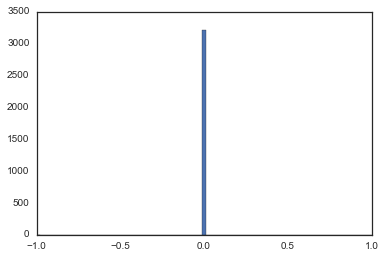

In [187]:
print len(reduced_samples['no cut']['1mu-1p'][reduced_samples['no cut']['1mu-1p']['truth_Ev']>0])
plt.hist(reduced_samples['no cut']['1mu-1p']['truth_Ev']-reduced_samples['no cut']['1mu-1p']['closest_genie_Ev'],bins=np.linspace(-1,1,100));
# plt.hist(reduced_samples['no cut']['1mu-1p']['reco_CC1p_Ev_fromE'])
# sam = reduced_samples['no cut']['1mu-1p']
# Q2 = sam['truth_Q2']
# print len(Q2)
# plt.hist(reduced_samples['no cut']['1mu-1p']['truth_Ev'],bins = np.linspace(-0.1,2,100));

20.0 % with ratio< 8 %
28.1 % with ratio< 8 %
32.9 % with ratio< 8 %
51.4 % with ratio< 8 %


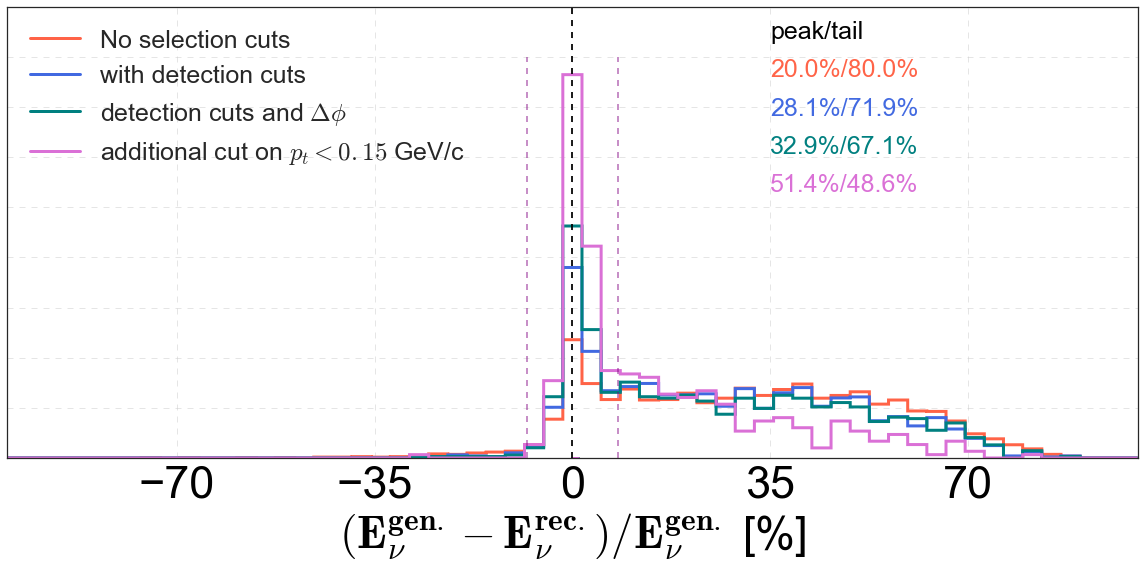

In [188]:
# Ev before and after the cuts
good_percentage = 8 # above 10% we consider bad Ev reconstruction
fig,ax=plt.subplots(figsize=(16,8))
bins = np.linspace(-100,100,60)
fgood_arr = []
cuts   = ['no cut','vertex $\Delta Q$', '$|\Delta \phi - \pi|<40^{0}$' , '$p_{t}<0.15$' ]                                
labels = ['No selection cuts','with detection cuts','detection cuts and $\\Delta \\phi$', 'additional cut on $p_{t}<0.15$ GeV/c']
colors = ['tomato','royalblue','teal','Orchid']
for cut_name,label,color in zip(cuts,labels,colors):
    sample = reduced_samples[cut_name]['1mu-1p']
    ratio = 100*(sample['closest_genie_Ev'] - sample['reco_CC1p_Ev_fromE'])/sample['closest_genie_Ev']
    h,bins,_=plt.hist( ratio , bins=bins, histtype='step',linewidth=3,normed=1,color=color);
    plt.plot([0,0],'-',color=color,label=label,linewidth=3)
    fgood_arr.append(100.*find_fraction_of_good_Ev( sample=ratio, good_percentage=good_percentage ))

plt.text( 35 , 0.95*np.max(ax.get_ylim())*(1.1) , 'peak/tail' , fontsize=25 , color='black' )
for i,fgood,color in zip(range(len(fgood_arr)),fgood_arr,colors):    
    plt.text( 35 , 0.95*np.max(ax.get_ylim())*(1-0.1*i) , '%.1f'%fgood+'%'+'/%.1f'%(100-fgood)+'%'  , fontsize=25 , color=color )
ax.plot([good_percentage,good_percentage],ax.get_ylim(),'--',[-good_percentage,-good_percentage],ax.get_ylim(),'--',color='purple',alpha=0.5)
ax.grid(linestyle='--',alpha=0.5)
# ax.set_title('all $\\mu p$ pairs',fontsize=25,y=1.02)
ax.legend(loc='upper left',fontsize=25)
plt.plot([0,0],ax.get_ylim(),'--',color='black')
set_axes(ax,'$\\bf{(E^{gen.}_{\\nu}-E^{rec.}_{\\nu})/E^{gen.}_{\\nu}}$ [%]',ticks_color='black',fontsize=45)
ax.xaxis.set_ticks([-70,-35,0,35,70]);
# ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
ax.yaxis.set_major_formatter(ticker.NullFormatter())
plt.tight_layout()
fig.savefig(figures_path+'EvReconstructed.pdf')

39.7 % with ratio< 8 %
18.6 % with ratio< 8 %
13.0 % with ratio< 8 %


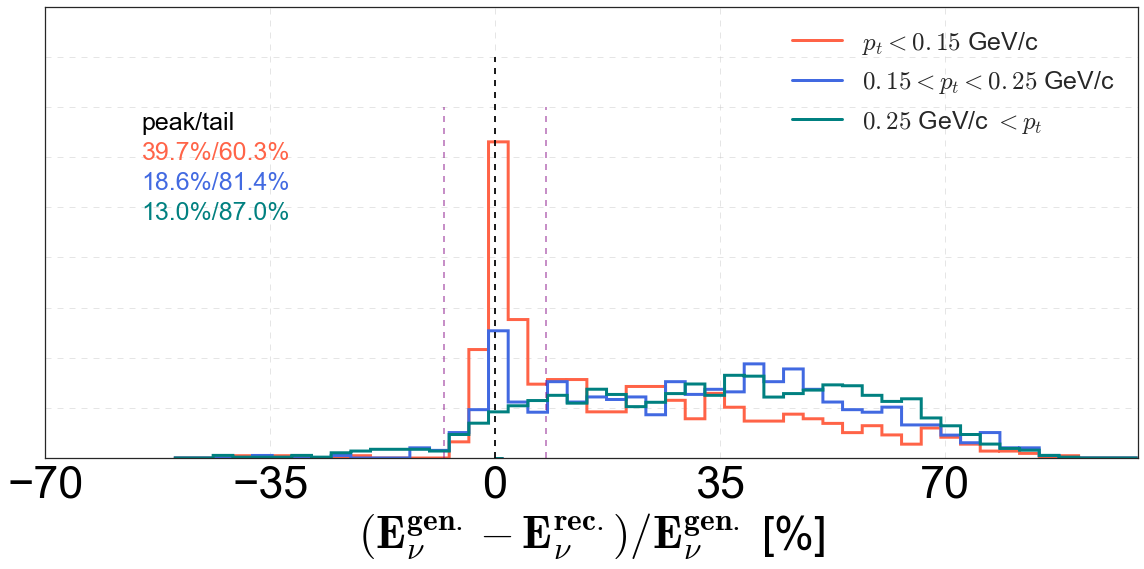

In [189]:
# In Pt bins after cuts
good_percentage = 8 # above 10% we consider bad Ev reconstruction
fig,ax=plt.subplots(figsize=(16,8))
bins = np.linspace(-50,100,50)
PtBins = [[0,0.1],[0.1,0.2],[0.2,1.0]]
mu_p =  reduced_samples['no cut']['1mu-1p']

cuts_s = [mu_p[mu_p['reco_CC1p_Pt']<0.15],mu_p[(mu_p['reco_CC1p_Pt']>0.15)&(mu_p['reco_CC1p_Pt']<0.25)],mu_p[mu_p['reco_CC1p_Pt']>0.25]]                                
labels = ['$p_{t}<0.15$ GeV/c','$0.15<p_{t}<0.25$ GeV/c','$0.25$ GeV/c $<p_{t}$']
colors = ['tomato','royalblue','teal']


fgood_arr = []
for sample,label,color in zip(cuts_s,labels,colors):
    ratio = 100*(sample['closest_genie_Ev'] - sample['reco_CC1p_Ev_fromE'])/sample['closest_genie_Ev']
    plt.hist( ratio , bins=bins, histtype='step',linewidth=3,normed=1,color=color);
    plt.plot([0,0],'-',color=color,label=label,linewidth=3)
    fgood_arr.append(100.*find_fraction_of_good_Ev( sample=ratio, good_percentage=good_percentage ))

plt.text( -55 , 0.85*np.max(ax.get_ylim())*(1.1) , 'peak/tail' , fontsize=25 , color='black' )
for i,fgood,color in zip(range(len(fgood_arr)),fgood_arr,colors):    
    plt.text( -55 , 0.85*np.max(ax.get_ylim())*(1-0.1*i) , '%.1f'%fgood+'%'+'/%.1f'%(100-fgood)+'%' , fontsize=25 , color=color )

ax.plot([good_percentage,good_percentage],ax.get_ylim(),'--',[-good_percentage,-good_percentage],ax.get_ylim(),'--',color='purple',alpha=0.5)
ax.grid(linestyle='--',alpha=0.5)
ax.legend(loc='upper right',fontsize=25)
plt.plot([0,0],ax.get_ylim(),'--',color='black')
set_axes(ax,'$\\bf{(E^{gen.}_{\\nu}-E^{rec.}_{\\nu})/E^{gen.}_{\\nu}}$ [%]',ticks_color='black',fontsize=45,nticklabels=4)
ax.xaxis.set_ticks([-70,-35,0,35,70]);
ax.yaxis.set_major_formatter(ticker.NullFormatter())
plt.tight_layout()
plt.savefig(figures_path+'EvReconstructedBinsPt.pdf')

51.4 % with ratio< 8 %
27.5 % with ratio< 8 %
11.5 % with ratio< 8 %


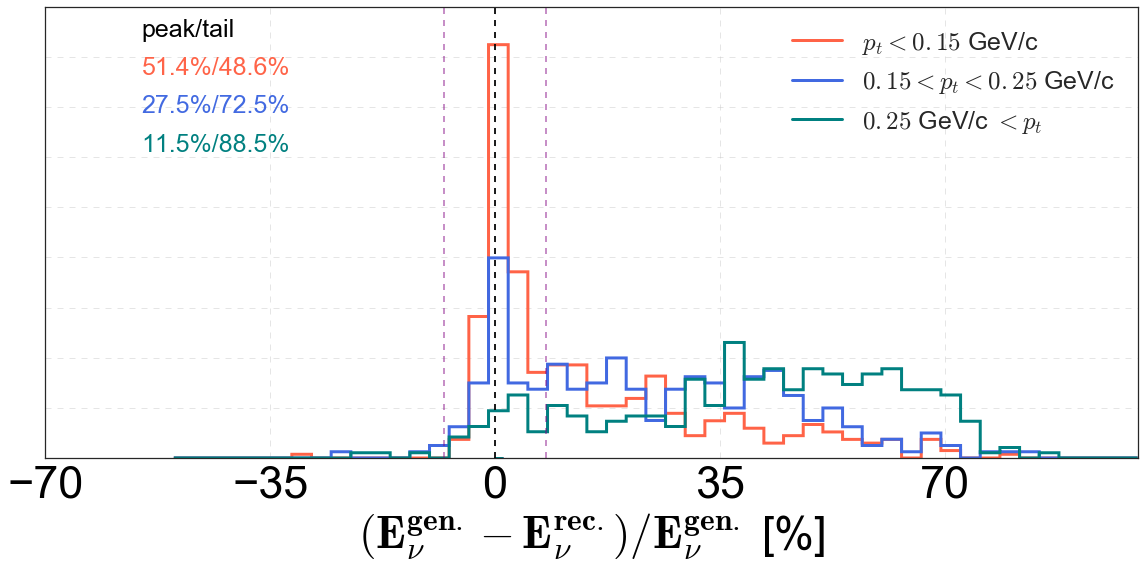

In [190]:
# In Pt bins after cuts
good_percentage = 8 # above 10% we consider bad Ev reconstruction
fig,ax=plt.subplots(figsize=(16,8))
bins = np.linspace(-50,100,50)
PtBins = [[0,0.1],[0.1,0.2],[0.2,1.0]]
mu_p =  reduced_samples['$|\Delta \phi - \pi|<40^{0}$']['1mu-1p']

cuts_s = [mu_p[mu_p['reco_CC1p_Pt']<0.15],mu_p[(mu_p['reco_CC1p_Pt']>0.15)&(mu_p['reco_CC1p_Pt']<0.25)],mu_p[mu_p['reco_CC1p_Pt']>0.25]]                                
labels = ['$p_{t}<0.15$ GeV/c','$0.15<p_{t}<0.25$ GeV/c','$0.25$ GeV/c $<p_{t}$']
colors = ['tomato','royalblue','teal']


fgood_arr = []
for sample,label,color in zip(cuts_s,labels,colors):
    ratio = 100*(sample['closest_genie_Ev'] - sample['reco_CC1p_Ev_fromE'])/sample['closest_genie_Ev']
    plt.hist( ratio , bins=bins, histtype='step',linewidth=3,normed=1,color=color);
    plt.plot([0,0],'-',color=color,label=label,linewidth=3)
    fgood_arr.append(100.*find_fraction_of_good_Ev( sample=ratio, good_percentage=good_percentage ))

plt.text( -55 , 0.85*np.max(ax.get_ylim())*(1.1) , 'peak/tail' , fontsize=25 , color='black' )
for i,fgood,color in zip(range(len(fgood_arr)),fgood_arr,colors):    
    plt.text( -55 , 0.85*np.max(ax.get_ylim())*(1-0.1*i) , '%.1f'%fgood+'%'+'/%.1f'%(100-fgood)+'%' , fontsize=25 , color=color )

ax.plot([good_percentage,good_percentage],ax.get_ylim(),'--',[-good_percentage,-good_percentage],ax.get_ylim(),'--',color='purple',alpha=0.5)
ax.grid(linestyle='--',alpha=0.5)
ax.legend(loc='upper right',fontsize=25)
plt.plot([0,0],ax.get_ylim(),'--',color='black')
set_axes(ax,'$\\bf{(E^{gen.}_{\\nu}-E^{rec.}_{\\nu})/E^{gen.}_{\\nu}}$ [%]',ticks_color='black',fontsize=45,nticklabels=4)
ax.xaxis.set_ticks([-70,-35,0,35,70]);
ax.yaxis.set_major_formatter(ticker.NullFormatter())
plt.tight_layout()
plt.savefig(figures_path+'EvReconstructedBinsPt_after_cut_5.pdf')

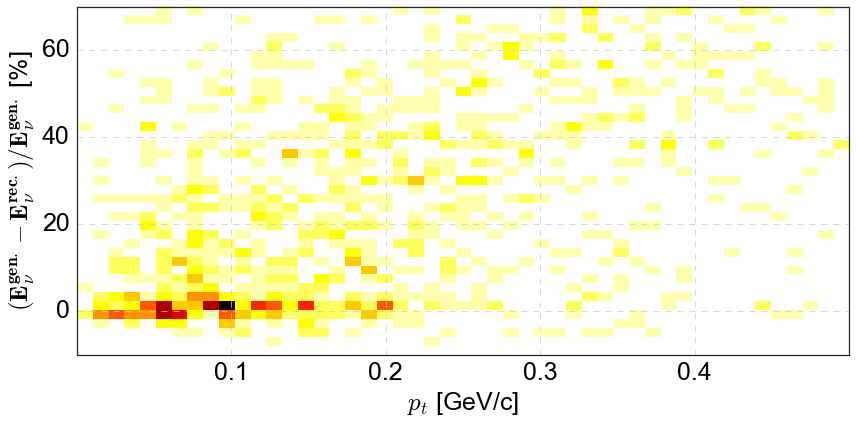

In [192]:
# 2d Ev vs. Pt
fig = plt.figure(figsize=(12,6))
bins=(np.linspace(0,.5,50),np.linspace(-10,70,40))
x_label,y_label='$p_{t}$ [GeV/c]','$\\bf{(E^{gen.}_{\\nu}-E^{rec.}_{\\nu})/E^{gen.}_{\\nu}}$ [%]'
mu_p_after_cuts =  reduced_samples['$|\Delta \phi - \pi|<40^{0}$']['1mu-1p']
ax = fig.add_subplot(1,1,1)
ratio = 100*(mu_p_after_cuts['truth_Ev'] - mu_p_after_cuts['reco_CC1p_Ev_fromE'])/mu_p_after_cuts['truth_Ev']
plot_2d_hist(mu_p_after_cuts['reco_CC1p_Pt'], ratio, ax=ax,fontsize=figures_fontsize,ticks_color='black',bins=bins,norm='')
set_axes(ax,x_label=x_label,y_label=y_label)
ax.xaxis.set_ticks([0.1,0.2,0.3,0.4])
ax.yaxis.set_ticks([0,20,40,60])
ax.grid(linestyle='--',alpha=0.75)
plt.tight_layout()
fig.savefig(figures_path+'EvReconstructedVsPt.pdf')

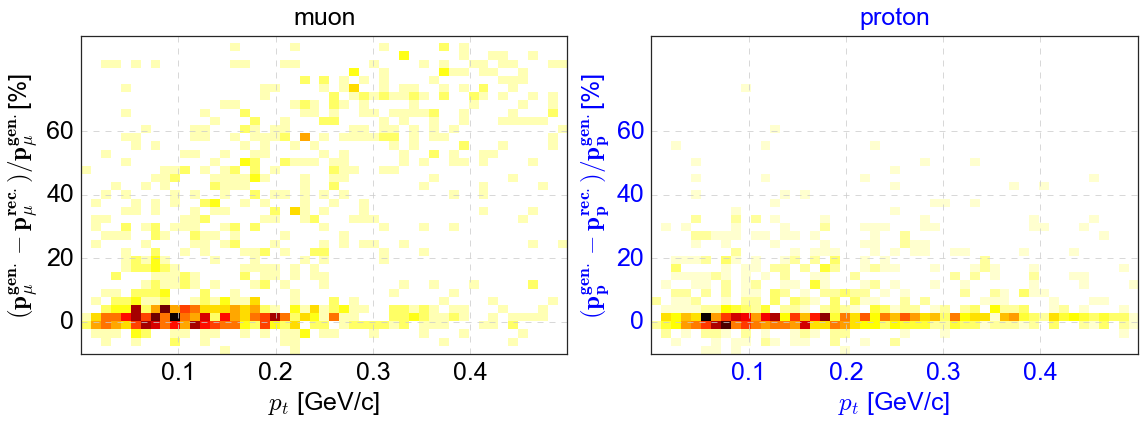

In [193]:
mu_p_after_cuts =  reduced_samples['$|\Delta \phi - \pi|<40^{0}$']['1mu-1p']

# 2d reconstructed momentum vs. Pt
fig = plt.figure(figsize=(16,6))
bins=(np.linspace(0,.5,50),np.linspace(-10,90,40))
x_label = '$p_{t}$ [GeV/c]'

for i,name,par,pname,color in zip(range(2),['muon','proton'],['mu','p'],['\\mu','p'],['black','blue']):
    
    ax = fig.add_subplot(1,2,i+1)
    y_label = '$\\bf{(p^{gen.}_{%s}-p^{rec.}_{%s})/p^{gen.}_{%s}}$'%(pname,pname,pname)+'[%]'
    ax.set_title(name,y=1.02,fontsize=25,color=color)
    ratio = 100*(mu_p_after_cuts['truth_P%s'%par] - mu_p_after_cuts['reco_CC1p_P%s'%par])/mu_p_after_cuts['truth_P%s'%par]
    plot_2d_hist(mu_p_after_cuts['reco_CC1p_Pt'], ratio, ax=ax,fontsize=figures_fontsize,bins=bins,norm='')
    set_axes(ax,x_label=x_label,y_label=y_label,ticks_color=color)
    ax.xaxis.set_ticks([0.1,0.2,0.3,0.4])
    ax.yaxis.set_ticks([0,20,40,60])
    ax.grid(linestyle='--',alpha=0.75)
    
plt.tight_layout()
fig.savefig(figures_path+'ReconstructedMomentumVsPt.pdf')

# Q2 reconstruction

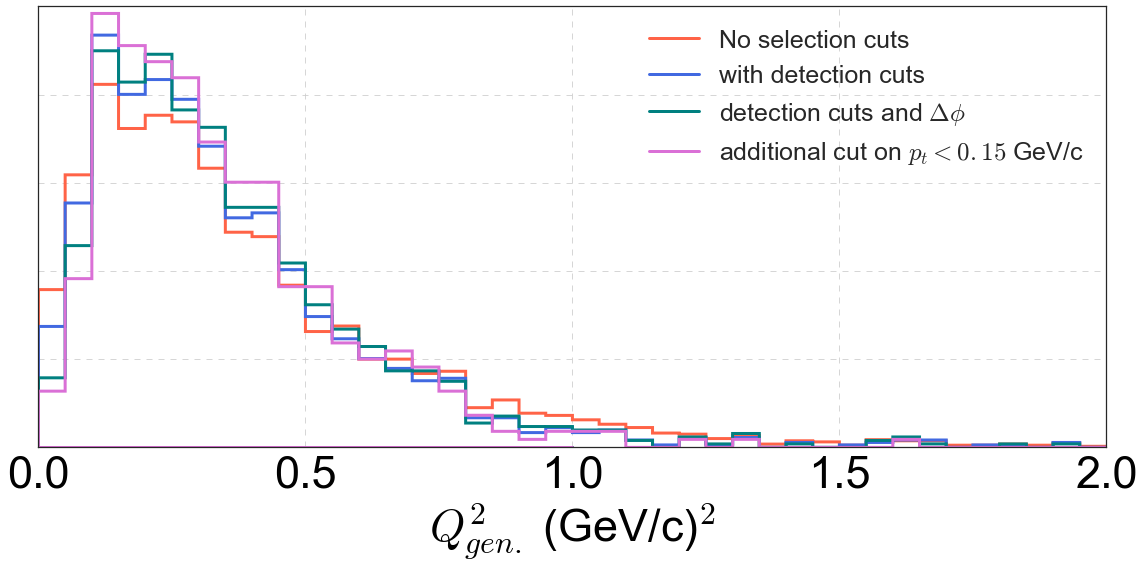

In [194]:
# Q2 before and after the cuts
bins = np.linspace(0.,2,41)
cuts   = ['no cut','vertex $\Delta Q$', '$|\Delta \phi - \pi|<40^{0}$' , '$p_{t}<0.15$' ]                                
labels = ['No selection cuts','with detection cuts','detection cuts and $\\Delta \\phi$', 'additional cut on $p_{t}<0.15$ GeV/c']
colors = ['tomato','royalblue','teal','Orchid']

fig_truth=plt.figure(figsize=(16,8))
ax_truth = fig_truth.add_subplot(111)

for cut_name,label,color in zip(cuts,labels,colors):
    
    sample = reduced_samples[cut_name]['1mu-1p']
    truth_Q2 = sample['truth_Q2']
    h,bins,_=plt.hist( truth_Q2 , bins=bins, histtype='step',linewidth=3,normed=1,color=color);
    plt.plot([0,0],'-',color=color,label=label,linewidth=3)

set_axes(ax_truth,'$Q^{2}_{gen.}$ (GeV/c)$^2$',ticks_color='black',fontsize=45,do_add_grid=True)
ax_truth.legend(loc='upper right',fontsize=25)
ax_truth.yaxis.set_major_formatter(ticker.NullFormatter())

plt.tight_layout()
fig_truth.savefig(figures_path+'Q2_truth_before_after_cuts.pdf')

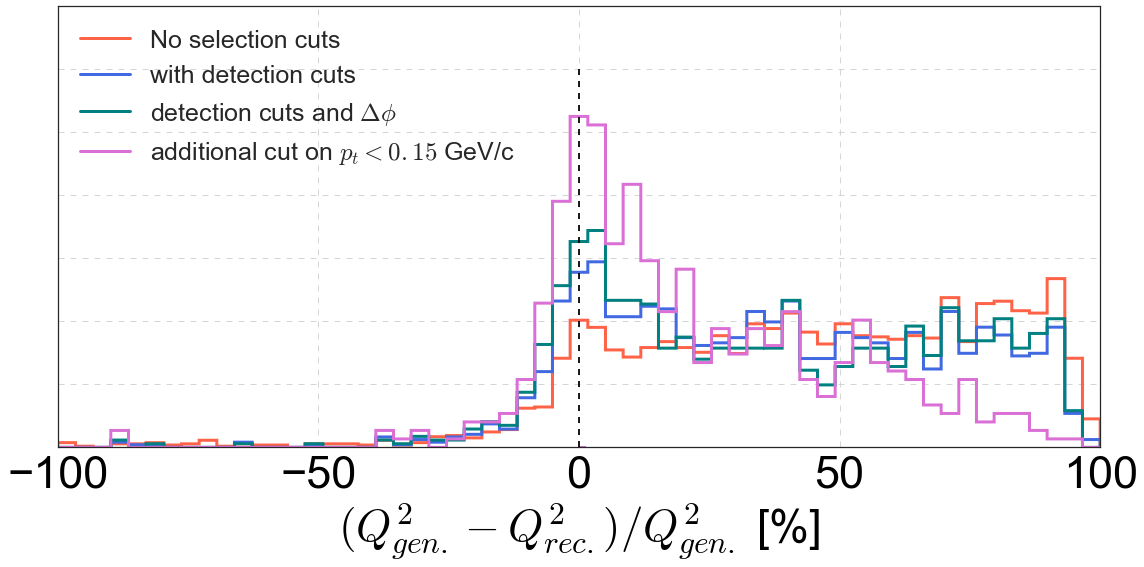

In [197]:
# reconstructed Q2 before and after the cuts
bins = np.linspace(-100,100,60)

fig_reco=plt.figure(figsize=(16,8))
ax_reco = fig_reco.add_subplot(111)

for cut_name,label,color in zip(cuts,labels,colors):
    
    sample = reduced_samples[cut_name]['1mu-1p']
    truth_Q2 = sample['truth_Q2']
    reco_Q2 = sample['reco_CC1p_Q2_fromE']
    dQ2 = truth_Q2 - reco_Q2
    ratio = 100*dQ2/[Q2 if Q2>0.01 else 0.01 for Q2 in truth_Q2]
    h,bins,_=plt.hist( ratio , bins=bins, histtype='step',linewidth=3,normed=1,color=color);
    plt.plot([0,0],'-',color=color,label=label,linewidth=3)

ax_reco.plot([0,0],ax_reco.get_ylim(),'--',color='black')
set_axes(ax_reco,'$(Q^{2}_{gen.} - Q^{2}_{rec.})/Q^{2}_{gen.}$ [%]',ticks_color='black',fontsize=45,do_add_grid=True)
ax_reco.legend(loc='upper left',fontsize=25)
ax_reco.yaxis.set_major_formatter(ticker.NullFormatter())
plt.tight_layout()
fig_reco.savefig(figures_path+'Q2_reco_ratio_before_after_cuts.pdf')

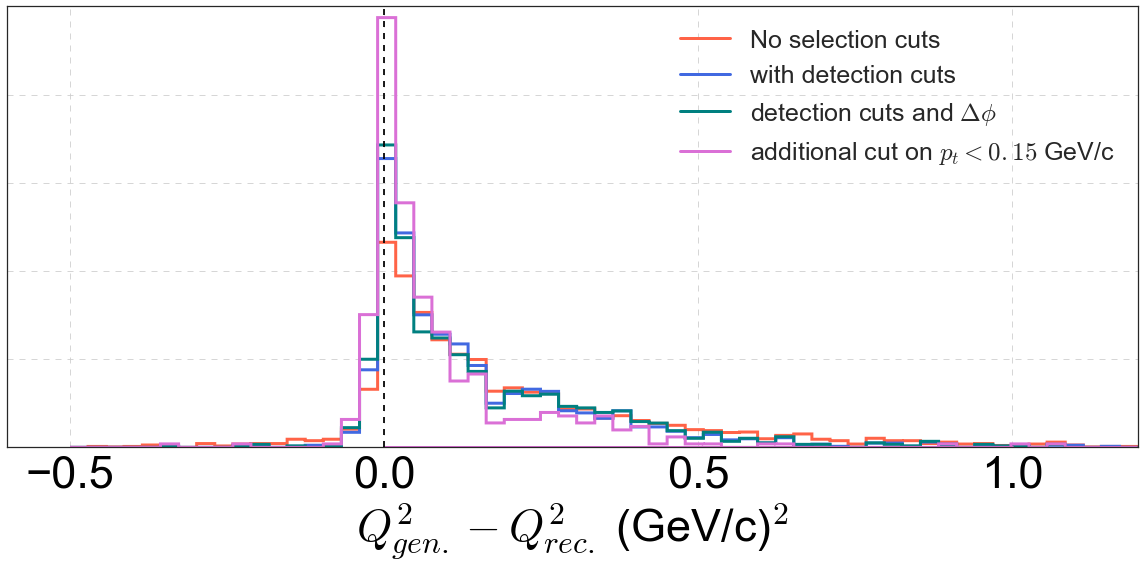

In [198]:
# reconstructed Q2 before and after the cuts
bins = np.linspace(-0.5,1.2,60)

fig_reco=plt.figure(figsize=(16,8))
ax_reco = fig_reco.add_subplot(111)

for cut_name,label,color in zip(cuts,labels,colors):
    
    sample = reduced_samples[cut_name]['1mu-1p']
    truth_Q2 = sample['closest_genie_Q2']
    reco_Q2 = sample['reco_CC1p_Q2_fromE']
    dQ2 = truth_Q2 - reco_Q2
    h,bins,_=plt.hist( dQ2 , bins=bins, histtype='step',linewidth=3,normed=1,color=color);
    plt.plot([0,0],'-',color=color,label=label,linewidth=3)

ax_reco.plot([0,0],ax_reco.get_ylim(),'--',color='black')
set_axes(ax_reco,'$Q^{2}_{gen.} - Q^{2}_{rec.}$ (GeV/c)$^2$',ticks_color='black',fontsize=45,do_add_grid=True)
ax_reco.legend(loc='upper right',fontsize=25)
ax_reco.yaxis.set_major_formatter(ticker.NullFormatter())
plt.tight_layout()
fig_reco.savefig(figures_path+'Q2_reco_before_after_cuts.pdf')

In [49]:
# What are the events with such a bad reconstruction???
sample = reduced_samples['no cut']['1mu-1p']
good_Q2_sample = sample[np.abs(sample['truth_Q2']-sample['reco_CC1p_Q2_fromE'])/sample['truth_Q2'] < 0.4]
print 'good fraction: %.1f'%(100.*float(len(good_Q2_sample))/len(sample))+'%'
bad_Q2_sample = sample[np.abs(sample['truth_Q2']-sample['reco_CC1p_Q2_fromE'])/sample['truth_Q2'] > 0.4]
print 'bad fraction: %.1f'%(100.*float(len(bad_Q2_sample))/len(sample))+'%'

has_truth_Pmu_sample = sample[np.abs(sample['truth_Pmu']) > 0.01]
print 'has truth Pmu fraction: %.1f'%(100.*float(len(has_truth_Pmu_sample))/len(sample))+'%'
doesnthave_truth_Pmu_sample = sample[np.abs(sample['truth_Pmu']) < 0.01]
print 'does not have truth Pmu fraction: %.1f'%(100.*float(len(doesnthave_truth_Pmu_sample))/len(sample))+'%'

good fraction: 83.4%
bad fraction: 16.6%
has truth Pmu fraction: 33.0%
does not have truth Pmu fraction: 67.0%


In [200]:
# What are the events with such a bad reconstruction???
sample = reduced_samples['no cut']['1mu-1p']
print "len(sample):",len(sample)
good_Q2_sample = sample[np.abs(sample['closest_genie_Q2']-sample['reco_CC1p_Q2_fromE']) < 0.4]
print 'good fraction: %.1f'%(100.*float(len(good_Q2_sample))/len(sample))+'%'
bad_Q2_sample = sample[np.abs(sample['closest_genie_Q2']-sample['reco_CC1p_Q2_fromE']) > 0.4]
print 'bad fraction: %.1f'%(100.*float(len(bad_Q2_sample))/len(sample))+'%'

has_truth_Q2_sample = sample[np.abs(sample['closest_genie_Q2']) > 0.01]
print 'has truth Pmu fraction: %.1f'%(100.*float(len(has_truth_Q2_sample))/len(sample))+'%'
doesnthave_truth_Q2_sample = sample[np.abs(sample['closest_genie_Q2']) < 0.01]
print 'does not have truth Pmu fraction: %.1f'%(100.*float(len(doesnthave_truth_Q2_sample))/len(sample))+'%'

len(sample): 3243
good fraction: 82.8%
bad fraction: 17.2%
has truth Pmu fraction: 99.6%
does not have truth Pmu fraction: 0.4%


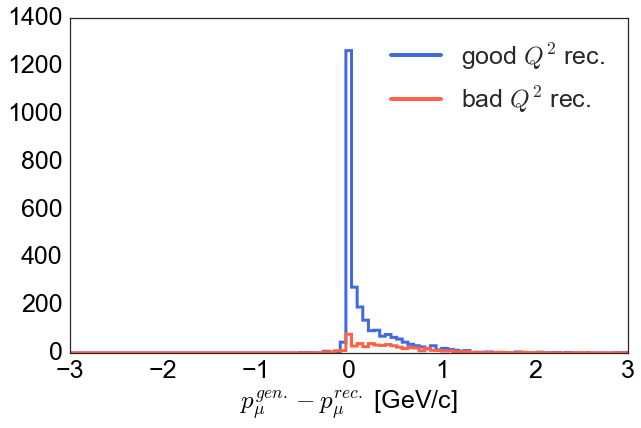

In [201]:
fig,ax=plt.subplots(figsize=(10,6))
for sample,label,color in zip([good_Q2_sample,bad_Q2_sample]
                               ,['good $Q^{2}$ rec.','bad $Q^{2}$ rec.']
                               ,['royalblue','tomato']):
    
#     plt.hist( sample['truth_Q2']  , bins=np.linspace(-1,3,100) 
#     plt.hist( sample['truth_Q2']-sample['reco_CC1p_Q2_fromE']  , bins=np.linspace(-3,3,100) 
    plt.hist( sample['truth_Pmu']-sample['reco_CC1p_Pmu']  , bins=np.linspace(-3,3,100) 
#     plt.hist( sample['truth_l_muon']-sample['l_muon']  , bins=np.linspace(-50,50,100) 
#     plt.hist( 180./np.pi*(sample['truth_Pmu_theta']-sample['reco_CC1p_Pmu_theta'] ) , bins=np.linspace(-180,180,100) 
#     plt.hist( sample['truth_Emu']-sample['reco_CC1p_Emu']  , bins=np.linspace(-3,3,100) 
             , histtype='step', color=color, linewidth=3
            )
    plt.plot([0,0],[0,0],'-',label=label,color=color,linewidth=4)

set_axes(ax,'$p_{\\mu}^{gen.} - p_{\\mu}^{rec.}$ [GeV/c]')
ax.legend(loc='best',fontsize=25)

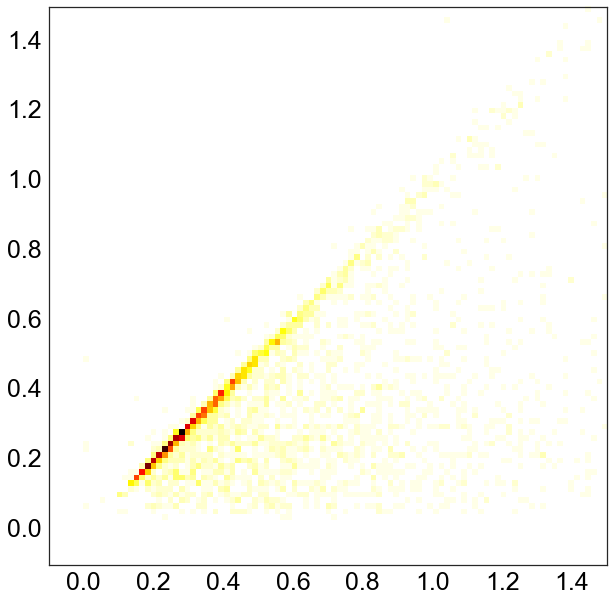

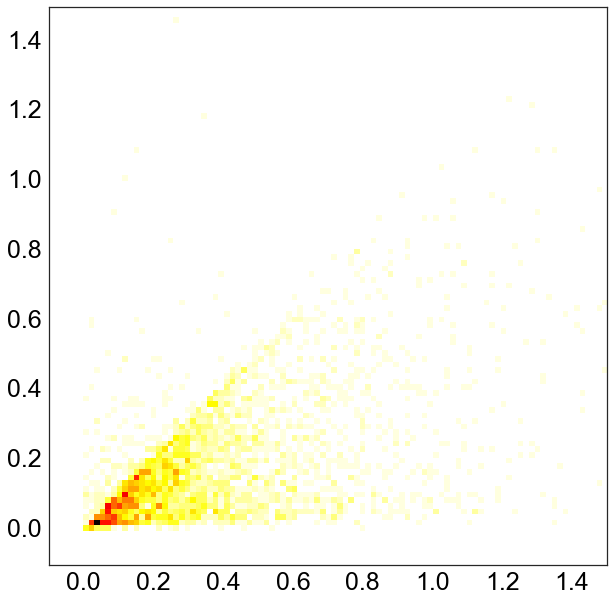

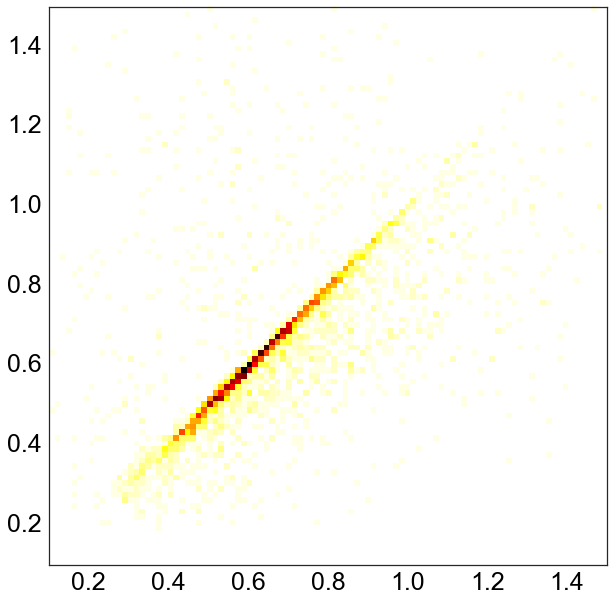

In [202]:
sample = reduced_samples['no cut']['1mu-1p']
plot_2d_hist( sample['closest_genie_Pmu'] , sample['reco_CC1p_Pmu'] 
             , bins=(np.linspace(-0.1,1.5,100),np.linspace(-0.1,1.5,100))
            );
plot_2d_hist( sample['truth_Q2'] , sample['reco_CC1p_Q2_fromE'] 
             , bins=(np.linspace(-0.1,1.5,100),np.linspace(-0.1,1.5,100))
            );
# plot_2d_hist( sample['truth_Q2'] , sample['closest_genie_Q2'] 
#              , bins=(np.linspace(-0.1,1.5,100),np.linspace(-0.1,1.5,100))
#             );
plot_2d_hist( sample['closest_genie_Pp'] , sample['reco_CC1p_Pp'] 
             , bins=(np.linspace(0.1,1.5,100),np.linspace(0.1,1.5,100))
            );